In [85]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:24pt;}
div.text_cell_render.rendered_html{font-size:20pt;}
div.text_cell_render li, div.text_cell_render p, code{font-size:22pt; line-height:40px;}
div.output {font-size:24pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:24pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:24pt;padding:5px;}
table.dataframe{font-size:24px;}
</style>
"""))

<font size="6" color='red'>ch1. 머신러닝 시작하기</font>
# 1절 머신러닝 개요
- insight : 탐색적 자료분석(EDA) : Pandas&Numpy, Matplotlib&Seaborn
- optimization : sckit-learn(머신러닝 패키지) statmodel, scipy.stats, tensorflow(딥러닝)

- 머신러닝이란? 학습을 통해 측정된 작업 성능을 향상
    * 지도학습(감독학습) - Decision tree, Random forest, Logistics Regression, SVM, KNN
    * 비지도학습(자율학습) - K-means(군집분석), PCA(주성분 분석), ...

# 2절 데이터 탐색
## 2.1 변수의 종류
- 데이터의 속성에 따라 명목식(남,여), 순서식(상중하, 서열이 있는 categorical), 
                구간식(간격척도, 순서의 간격의미), 비율식(연속형, 영점 존재)으로 데이터 구분
- 변수의 타입에 따라 연속형, 이산형, 범주형 데이터로 구분
- 데이터 품질에 따라 특이값(이상치), 결측값
## 2.2 통계 요약 :
- 중심위치 측도(평균, 중앙값, 최빈값)
- 산포 측도(왜도, 첨도)

In [13]:
import numpy as np
# np.random.normal(loc=평균, scale=표준편차, size=데이터수)
data = np.random.normal(0, 1, size=1000000)

In [14]:
print('평균 :', np.mean(data))
print("중위수 :", np.median(data))
print('분산 :', np.var(data))
print('표준편차 :', np.std(data))

평균 : 0.0005586247433576395
중위수 : 0.0009958129532129441
분산 : 1.000066947553153
표준편차 : 1.0000334732163483


In [15]:
from scipy.stats import kurtosis, skew # 첨도와 왜도
print('왜도 : ', skew(data)) # 음수면 왼쪽으로 긴꼬리 데이터(오른쪽으로 치우친 데이터)
print('첨도 :', kurtosis(data)) # 0이면 정규분포보다 뾰족

왜도 :  0.0015211600268969934
첨도 : 0.0003935174154245935


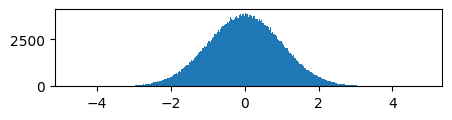

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,1))
plt.hist(data, bins=1000)
plt.show()

평균 : -0.7809263120368319
중위수 : -0.6735500428656966
분산 : 0.3868005736186297
표준편차 : 0.6219329333767667
왜도 : -0.8485661558098205
첨도 : 0.7027826611970438


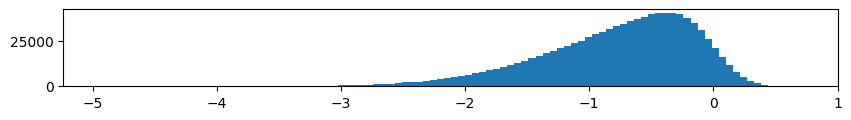

In [29]:
#정규 분포가 아닌 데이터
from scipy.stats import skewnorm, norm
# skewnorm(a=왜도를 조정하는 값, loc=분포위치, scale=분포의 폭).rvs(size=데이터 수)
data = skewnorm(a=-5, loc=0, scale=1).rvs(size=1000000)
print('평균 :', np.mean(data))
print('중위수 :', np.median(data))
print('분산 :', np.var(data))
print('표준편차 :', np.std(data))
print('왜도 :', skew(data)) # 대부분 왜도 -1 ~ 1
print('첨도 :', kurtosis(data))
plt.figure(figsize=(10,1))
plt.hist(data, bins=100)
plt.show()

## 2.3 기초통계량
- describe()함수
    * 수치형 데이터 : 최소값, 최대값, 사분위수, 평균, 표준편차, ...
    * 범주형 데이터 : unique()갯수, 최빈 데이터, 최빈 데이터 빈도

In [30]:
from seaborn import load_dataset
iris = load_dataset('iris')
iris.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [31]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [32]:
iris.species.nunique()

3

In [35]:
iris["species"].value_counts(ascending=False) # 오름차순 정렬

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

## 2.4 데이터 EDA 가속화
- pip install dataprep

- dataprep.eda의 모듈 주요함수
    * plot() : 각 변수의 분포를 막대그래프, 파이그래프, 산점도로 표시, 요약 통계
    * plot_correlation() : 변수들 사이의 상관계수를 히트맵으로 표시
    * plot_missing() : 결측치 분포를 확인할 수 있도록 표시
    * plot_diff([df1, df2], x="컬럼이름") : 두 데이터프레임의 특정 컬럼의 상세 비교

In [62]:
# from dataprep.eda import plot, plot_correlation, plot_missing, plot_diff
# plot(iris)
# show stats and Insights 버튼 클릭

In [63]:
# plot(iris, 'species')

In [64]:
# plot(iris, "petal_length", config={'hist.bins':150, 'box.color':'yellow'})

In [65]:
# plot_correlation(iris)

In [66]:
# plot_correlation(iris[['petal_length', 'petal_width']])

In [67]:
# plot_missing(iris)

In [68]:
# plot_diff([iris,iris])

## 2.5 상관분석
- 두 변수간 선형적 관계가 있는지 분석

<Axes: xlabel='petal_length', ylabel='petal_width'>

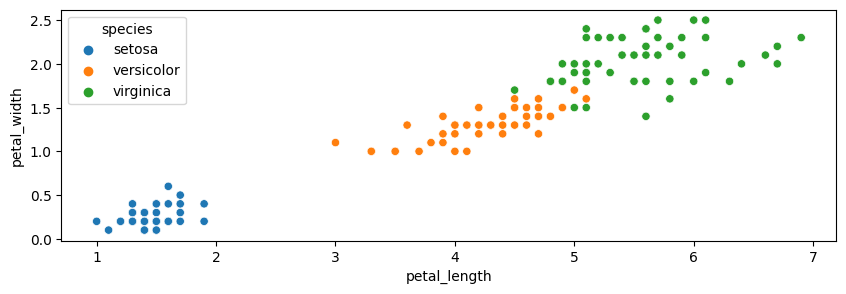

In [45]:
import seaborn as sns
plt.figure(figsize=(10,3))
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species')

### 공분산과 상관계수
- 공분산 : 각 변수의 평균간 거리의 평균(단위에 의존). 두 변수가 같은 방향으로 변하는지
- 상관계수 : 공분산을 표준편차로 나눔 : -1 ~ 1
#### Pearson correlation coefficient(피어슨 상관계수)
    * 두 변수가 모두 연속형일 때, 두 변수간 선형적 상관관계의 크기를 나타낸 값
    * -1 ~ 1 사이(-1:반비례, 1:비례)
    * 일반적으로 0.6이상이면 양의 강한 상관관계, -0.6이하면 음의 강한 상관관계

In [48]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.corr(numeric_only=True, method='pearson') # method='pearson'가 기본값

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [49]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(iris.petal_width, iris.petal_length)
corr, p_value

(0.9628654314027961, 4.6750039073286175e-86)

#### Spearman correlation coeffience(스피어만 상관계수)
- 데이터가 서열(순위) 데이터인 경우
- 두 연속형 데이터가 심하게 정규분포를 벗어난 경우

In [50]:
iris.corr(numeric_only=True, method='spearman')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.166778,0.881898,0.834289
sepal_width,-0.166778,1.000000,-0.309635,-0.289032
petal_length,0.881898,-0.309635,1.000000,0.937667
petal_width,0.834289,-0.289032,0.937667,1.000000


## 2.6 독립성 검정
- 두 변수간 상호작용을 통계적으로 유의한지 검증. 두 변수가 서로 영향을 주지 않고 독립적인지
### 2.6.1 피서의 검정
- 데이터 수가 작을 때

In [51]:
import pandas as pd
data = pd.DataFrame({'대서양':[8,2],
                     '인도양':[1,5]},
                    index=['고래','상어'])
data

,대서양,인도양
고래,8,1
상어,2,5


In [52]:
# 대서양에는 고래가 많고, 인도양에는 상어가 많다고 할 수 있는지 검정
from scipy.stats import fisher_exact
ratio, p_value = fisher_exact(data)
ratio, p_value
# p_value가 5% 이하인지
# ratio == 1 : 그 컬럼간 발생 비율 같다(독립적)
# ratio > 1 : 그룹1이 사건 발생 가능성이 높다
# ratio < 1 : 그룹2이 사건 발생 가능성이 높다

(20.0, 0.034965034965034975)

### 2.6.2 맥니마 검정
- 맥니마 검정은 치료효과를 대조군과 비교하기 위해 의학 널리 사용

In [55]:
data = pd.DataFrame({'치료후 양성':[59, 16, 75],
                     '치료후 음성':[6, 80, 86]},
                    index=['치료전 양성', '치료전 음성', '계'])
data

,치료후 양성,치료후 음성
치료전 양성,59,6
치료전 음성,16,80
계,75,86


In [57]:
import numpy as np
table = np.array(data.iloc[:2, :])
table

array([[59,  6],
       [16, 80]], dtype=int64)

In [61]:
# 약물이 특정 질병에 영향을 미치는지?
from statsmodels.stats.contingency_tables import mcnemar
result = mcnemar(table,
                 exact=True, # 이산형
                )
result.statistic, result.pvalue

(6.0, 0.052478790283203125)

# 3절. 데이터 전처리
- 데이터 스케일 조정, 인코딩, 원핫인코딩, 결측치 처리, 데이터 분할(학습/테스트)
- 데이터 처리 과정은 전 프로젝트의 약 60% 정도(오타 정정, 단어 통일, 고유명사 정리, 수치 데이터 단위 통일)

- 전체 AI프로젝트 과정 : 데이터 수집 - 데이터 전처리 - 모델 구축(ml/dl) - 모델 성능 평가(A/R/P/F1/ROC) - 서비스 제작 - 배포 및 유지보수
- 데이터 품질이 좋으면 전처리 시간 단축, 좋은 모델 구축, 모델 구축 시간 단축
## 3.1 데이터 스케일 조정
- fit(x)
- transform(x)
- fit_transform(x)
- inverse_transeform(x) - Normalizer는 없음

In [69]:
pd.DataFrame({'정규화':['스케일링 시 최대, 최소값이 사용',
'피쳐의 크기가 다를 때 사용',
'(0,1) 또는 (-1,1)사이의 값으로 스케일링',
'분포에 대해 모를 때 유용',
'MinMaxScaler, Normalizer,MaxAbsScaler'],
'표준화':['스케일링 시 평균과 표준편차가 사용된다.',
'평균이 0, 표준편차가 1로 스케일링',
'특정 범위로 제한되지 않는다',
'피처가 정규분포인 경우 유용',
'StandardScaler, RobustScaler']})

,정규화,표준화
0,"스케일링 시 최대, 최소값이 사용",스케일링 시 평균과 표준편차가 사용된다.
1,피쳐의 크기가 다를 때 사용,"평균이 0, 표준편차가 1로 스케일링"
2,"(0,1) 또는 (-1,1)사이의 값으로 스케일링",특정 범위로 제한되지 않는다
3,분포에 대해 모를 때 유용,피처가 정규분포인 경우 유용
4,"MinMaxScaler, Normalizer,MaxAbsScaler","StandardScaler, RobustScaler"


In [71]:
pd.DataFrame({
'Scaler 종류': ['StandardScaler', 'MinMaxScaler', 'MaxAbsScaler', 'RobustScaler',
'Normalizer'],
'적용 방식': ['Z-score 정규화',
'최소-최대 정규화',
'절댓값 최대 정규화',
'중앙값 기준 스케일링',
'벡터 정규화 (L2, L1)'],
'수식': ['(X-μ)/σ', '(X-Xmin)/(Xmax-Xmin)','X/max(|X|)','(X-Q2)/(Q3-Q1)','X/||X||'],
'결과 범위': ['평균 0, 표준편차 1','[0, 1]','[-1, 1]','중앙값 0, IQR 기준','벡터 크기 1'],
'특징': ['평균 0, 표준편차 1로 변환',
'최솟값 0, 최댓값 1로 변환',
'0 중심 유지, 부호 보존, 희소행렬에 적합',
'이상치 영향을 덜 받음',
'각 샘플의 크기를 1로 맞춤 (행 단위 정규화)'],
'이상치 영향': ['민감', '매우 민감', '민감', '적음', '없음'],
'주요 사용 상황': ['정규분포 가정 모델 (회귀, PCA, SVM)',
'값을 0~1로 조정해야 하는 경우',
'희소행렬, 0 보존 필요, 음수 포함',
'이상치가 많은 경우 안정적 변환',
'거리 기반 모델 (KNN, Cosine Similarity, NLP)']
})

,Scaler 종류,적용 방식,수식,결과 범위,특징,이상치 영향,주요 사용 상황
0,StandardScaler,Z-score 정규화,(X-μ)/σ,"평균 0, 표준편차 1","평균 0, 표준편차 1로 변환",민감,"정규분포 가정 모델 (회귀, PCA, SVM)"
1,MinMaxScaler,최소-최대 정규화,(X-Xmin)/(Xmax-Xmin),"[0, 1]","최솟값 0, 최댓값 1로 변환",매우 민감,값을 0~1로 조정해야 하는 경우
2,MaxAbsScaler,절댓값 최대 정규화,X/max(|X|),"[-1, 1]","0 중심 유지, 부호 보존, 희소행렬에 적합",민감,"희소행렬, 0 보존 필요, 음수 포함"
3,RobustScaler,중앙값 기준 스케일링,(X-Q2)/(Q3-Q1),"중앙값 0, IQR 기준",이상치 영향을 덜 받음,적음,이상치가 많은 경우 안정적 변환
4,Normalizer,"벡터 정규화 (L2, L1)",X/||X||,벡터 크기 1,각 샘플의 크기를 1로 맞춤 (행 단위 정규화),없음,"거리 기반 모델 (KNN, Cosine Similarity, NLP)"


In [74]:
df =pd.DataFrame({'x1':range(11),
                  'x2':[-100, -80, -60, -40, -20, 0, 20, 40, 60, 80, 500]})
df

,x1,x2
0,0,-100
1,1,-80
2,2,-60
3,3,-40
4,4,-20
5,5,0
6,6,20
7,7,40
8,8,60
9,9,80


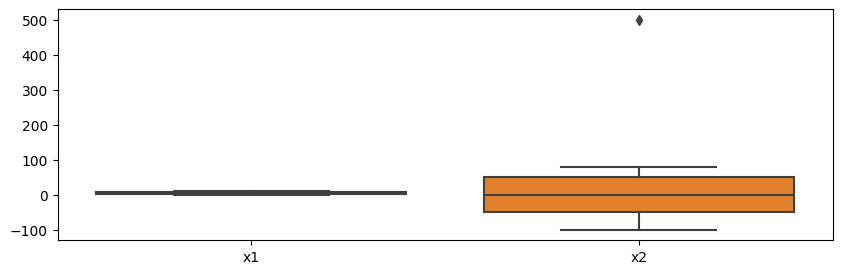

In [76]:
import seaborn as sns
import matplotlib.pylab as plt
plt.figure(figsize=(10,3))
sns.boxplot(df)
plt.show()

In [77]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.preprocessing import Normalizer

In [79]:
# StandardScaler : 평균0 표준편차1
scaler = StandardScaler()
ary_std = scaler.fit_transform(df)
df_std = pd.DataFrame(ary_std, columns=['x1_std', 'x2_std'])
result = pd.concat([df, df_std], axis=1)
result

,x1,x2,x1_std,x2_std
0,0,-100,-1.581139,-0.871269
1,1,-80,-1.264911,-0.743483
2,2,-60,-0.948683,-0.615697
3,3,-40,-0.632456,-0.487911
4,4,-20,-0.316228,-0.360124
5,5,0,0.000000,-0.232338
6,6,20,0.316228,-0.104552
7,7,40,0.632456,0.023234
8,8,60,0.948683,0.151020
9,9,80,1.264911,0.278806


In [81]:
# MinMaxScaler : 0~1사이
scaler = MinMaxScaler()
ary_min = scaler.fit_transform(df)
df_min = pd.DataFrame(ary_min, columns=['x1_min', 'x2_min'])
result = pd.concat([result, df_min], axis=1)
result

,x1,x2,x1_std,x2_std,x1_min,x2_min
0,0,-100,-1.581139,-0.871269,0.0,0.000000
1,1,-80,-1.264911,-0.743483,0.1,0.033333
2,2,-60,-0.948683,-0.615697,0.2,0.066667
3,3,-40,-0.632456,-0.487911,0.3,0.100000
4,4,-20,-0.316228,-0.360124,0.4,0.133333
5,5,0,0.000000,-0.232338,0.5,0.166667
6,6,20,0.316228,-0.104552,0.6,0.200000
7,7,40,0.632456,0.023234,0.7,0.233333
8,8,60,0.948683,0.151020,0.8,0.266667
9,9,80,1.264911,0.278806,0.9,0.300000


In [82]:
# MaxAbsScaler : -1~1사이
scaler = MaxAbsScaler()
ary_max = scaler.fit_transform(df)
df_max = pd.DataFrame(ary_max, columns=['x1_max', 'x2_max'])
result = pd.concat([result, df_max], axis=1)
result

,x1,x2,x1_std,x2_std,x1_min,x2_min,x1_max,x2_max
0,0,-100,-1.581139,-0.871269,0.0,0.000000,0.0,-0.20
1,1,-80,-1.264911,-0.743483,0.1,0.033333,0.1,-0.16
2,2,-60,-0.948683,-0.615697,0.2,0.066667,0.2,-0.12
3,3,-40,-0.632456,-0.487911,0.3,0.100000,0.3,-0.08
4,4,-20,-0.316228,-0.360124,0.4,0.133333,0.4,-0.04
5,5,0,0.000000,-0.232338,0.5,0.166667,0.5,0.00
6,6,20,0.316228,-0.104552,0.6,0.200000,0.6,0.04
7,7,40,0.632456,0.023234,0.7,0.233333,0.7,0.08
8,8,60,0.948683,0.151020,0.8,0.266667,0.8,0.12
9,9,80,1.264911,0.278806,0.9,0.300000,0.9,0.16


In [83]:
# RobustScaler : 중앙값0으로 사분위수 기준 정규화
scaler = RobustScaler()
ary_rob = scaler.fit_transform(df)
df_rob = pd.DataFrame(ary_rob, columns=['x1_rob', 'x2_rob'])
result = pd.concat([result, df_rob], axis=1)
result

,x1,x2,x1_std,x2_std,x1_min,x2_min,x1_max,x2_max,x1_rob,x2_rob
0,0,-100,-1.581139,-0.871269,0.0,0.000000,0.0,-0.20,-1.0,-1.0
1,1,-80,-1.264911,-0.743483,0.1,0.033333,0.1,-0.16,-0.8,-0.8
2,2,-60,-0.948683,-0.615697,0.2,0.066667,0.2,-0.12,-0.6,-0.6
3,3,-40,-0.632456,-0.487911,0.3,0.100000,0.3,-0.08,-0.4,-0.4
4,4,-20,-0.316228,-0.360124,0.4,0.133333,0.4,-0.04,-0.2,-0.2
5,5,0,0.000000,-0.232338,0.5,0.166667,0.5,0.00,0.0,0.0
6,6,20,0.316228,-0.104552,0.6,0.200000,0.6,0.04,0.2,0.2
7,7,40,0.632456,0.023234,0.7,0.233333,0.7,0.08,0.4,0.4
8,8,60,0.948683,0.151020,0.8,0.266667,0.8,0.12,0.6,0.6
9,9,80,1.264911,0.278806,0.9,0.300000,0.9,0.16,0.8,0.8


In [84]:
# Normalizer : inverse_transform이 없어서 사용 거의 x
scaler = Normalizer()
ary_nor = scaler.fit_transform(df)
df_nor = pd.DataFrame(ary_nor, columns=['x1_nor', 'x2_nor'])
result = pd.concat([result, df_nor], axis=1)
result

,x1,x2,x1_std,x2_std,x1_min,x2_min,x1_max,x2_max,x1_rob,x2_rob,x1_nor,x2_nor
0,0,-100,-1.581139,-0.871269,0.0,0.000000,0.0,-0.20,-1.0,-1.0,0.000000,-1.000000
1,1,-80,-1.264911,-0.743483,0.1,0.033333,0.1,-0.16,-0.8,-0.8,0.012499,-0.999922
2,2,-60,-0.948683,-0.615697,0.2,0.066667,0.2,-0.12,-0.6,-0.6,0.033315,-0.999445
3,3,-40,-0.632456,-0.487911,0.3,0.100000,0.3,-0.08,-0.4,-0.4,0.074790,-0.997199
4,4,-20,-0.316228,-0.360124,0.4,0.133333,0.4,-0.04,-0.2,-0.2,0.196116,-0.980581
5,5,0,0.000000,-0.232338,0.5,0.166667,0.5,0.00,0.0,0.0,1.000000,0.000000
6,6,20,0.316228,-0.104552,0.6,0.200000,0.6,0.04,0.2,0.2,0.287348,0.957826
7,7,40,0.632456,0.023234,0.7,0.233333,0.7,0.08,0.4,0.4,0.172380,0.985030
8,8,60,0.948683,0.151020,0.8,0.266667,0.8,0.12,0.6,0.6,0.132164,0.991228
9,9,80,1.264911,0.278806,0.9,0.300000,0.9,0.16,0.8,0.8,0.111795,0.993731


## 3.2 인코딩
### 레이블 인코딩 : 실제값과 상관없이 0~k-1 사이의 정수로 반환

In [91]:
import seaborn as sns
iris = sns.load_dataset('iris')
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(iris.species)
encoder.classes_ # classes_속성을 이용하여 종의 클래스 확인 

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [94]:
iris['enc_species'] = encoder.transform(iris.species)
iris.loc[::50]

,sepal_length,sepal_width,petal_length,petal_width,species,enc_species
0,5.1,3.5,1.4,0.2,setosa,0
50,7.0,3.2,4.7,1.4,versicolor,1
100,6.3,3.3,6.0,2.5,virginica,2


In [95]:
species = encoder.transform(iris.species)
species # 1차원

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [96]:
# 레이블 인코딩한 결과를 원상복귀
encoder.inverse_transform(species)

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

### 원핫인코딩
- sklearn.preprocessing.OneHotEncoder : 2차원 정수 데이터를 원핫인코딩하는 encoder
- sklearn.preprocessing.LabelBinerizer : 1,2차원 정수나 문자 데이터
- tensor.keras.utils.to_categorical() : 1차원 정수 데이터
- pd.get_dummies() : 1차원 정수나 문자 데이터

In [97]:
species.reshape(-1,1)[:3] # 원핫인코딩할 2차원 데이터

array([[0],
       [0],
       [0]])

In [102]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(species.reshape(-1,1))
iris_onehot = enc.transform(species.reshape(-1,1)).toarray()
iris_onehot[::50]

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [105]:
from sklearn.preprocessing import LabelBinarizer
lbinerizer = LabelBinarizer()
iris_hot = lbinerizer.fit_transform(iris.species)
iris_hot[::50]

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [108]:
from tensorflow.keras.utils import to_categorical
to_categorical(species, 3)[::50] # 1차원 정수

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [110]:
pd.get_dummies(iris.species).loc[::50] # 1차원 정수나 문자. 데이터프레임으로 return

,setosa,versicolor,virginica
0,1,0,0
50,0,1,0
100,0,0,1


### 평균값 인코딩
- 레이블 값을 수치적으로 구분할 수 있는 값으로 대체
- 이렇게 인코딩한 값은 예측값과 수치적인 면에서 연관성 있음
- 과적합(오버피팅) 문제가 발생할 수 있음

In [113]:
titanic = sns.load_dataset('titanic')
# 성별 생존율
sex_mean = titanic.groupby('sex')['survived'].mean()
sex_mean

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [116]:
titanic['sex_mean'] = titanic['sex'].map(sex_mean)
titanic.drop('sex_mean', axis=1, inplace=True)

In [118]:
titanic.insert(3, 'sex_mean', titanic['sex'].map(sex_mean))

In [119]:
titanic.head()

,survived,pclass,sex,sex_mean,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,0.188908,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,0.742038,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,0.742038,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,0.742038,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,0.188908,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### pivot_table(groupby) vs. pivot

In [120]:
# 위 평균값 인코딩을 하나의 열로 만들 수도 있고, 아래처럼 원핫인코딩 같이 두개의 열로 만들 수 있음
titanic.pivot_table(columns='survived',
                    index=titanic.index,
                    values='sex_mean')

survived,0,1
0,0.188908,NaN
1,NaN,0.742038
2,NaN,0.742038
3,NaN,0.742038
4,0.188908,NaN
...,...,...
886,0.188908,NaN
887,NaN,0.742038
888,0.742038,NaN
889,NaN,0.188908


In [127]:
df = pd.DataFrame({'학생':['철수']*4 + ['영희']*4,
                   '과목':['수학','과학']*4,
                   '점수':range(20,100,10)})
print('원본데이터')
# display(df)
print('합계 데이터')
df.pivot_table(columns='학생',
               index='과목',
               values='점수',
               aggfunc='mean')

원본데이터
합계 데이터


학생,영희,철수
과목,,
과학,80,40
수학,70,30


In [130]:
df = pd.DataFrame({'학생':['철수']*2 + ['영희']*2,
                   '과목':['수학','과학']*2,
                   '점수':range(60,100,10)})
print('원본데이터')
display(df)
df.pivot(columns='학생',
         index='과목',
         values='점수')

원본데이터


,학생,과목,점수
0,철수,수학,60
1,철수,과학,70
2,영희,수학,80
3,영희,과학,90


학생,영희,철수
과목,,
과학,90,70
수학,80,60


## 3.3 결측치 처리
- pd.fillna() : 결과가 데이터프레임. 대체값이 평균, 중앙값, 특정한 값, ffill(이전값), bfill(다음값)
- sklearn.impute.SimpleImputer() : 결과가 numpy배열. 대체값 평균, 중앙값, 최빈값

In [151]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris_X = iris.iloc[:, :-1]
iris_y = iris.iloc[:,-1]

In [143]:
import random
iris_len = len(iris)
idxs = random.sample(range(iris_len),20) # 0~149사이의 임의 수 20개
print(idxs)

[18, 91, 141, 115, 89, 77, 148, 25, 145, 93, 62, 94, 10, 55, 15, 64, 68, 37, 149, 103]


In [152]:
for col in range(4):
    idxs = random.sample(range(iris_len), 10)
    print("{}번째 컬럼의 결측치 행 : {}".format(col, idxs))
    iris_X.iloc[idxs, col] = float('nan')# np.nan

0번째 컬럼의 결측치 행 : [5, 89, 90, 36, 82, 2, 124, 24, 16, 76]
1번째 컬럼의 결측치 행 : [70, 76, 18, 118, 23, 95, 21, 127, 2, 77]
2번째 컬럼의 결측치 행 : [14, 18, 34, 100, 64, 143, 117, 27, 109, 120]
3번째 컬럼의 결측치 행 : [42, 90, 63, 6, 48, 141, 143, 5, 55, 139]


In [153]:
iris_X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,NaN,NaN,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [154]:
iris_X.isna().sum()

sepal_length    10
sepal_width     10
petal_length    10
petal_width     10
dtype: int64

In [159]:
# 결측치 대체
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(strategy='mean') # 평균값으로 대체(결과가 numpy 배열)
imp_mean.fit_transform(iris_X)

iris_X.fillna(value=iris_X.mean(axis=0)) # 평균값으로 대체(결과가 데이터프레임)

,sepal_length,sepal_width,petal_length,petal_width
0,5.10,3.50,1.4,0.2
1,4.90,3.00,1.4,0.2
2,5.86,3.05,1.3,0.2
3,4.60,3.10,1.5,0.2
4,5.00,3.60,1.4,0.2
...,...,...,...,...
145,6.70,3.00,5.2,2.3
146,6.30,2.50,5.0,1.9
147,6.50,3.00,5.2,2.0
148,6.20,3.40,5.4,2.3


In [160]:
# 결측치 대체
from sklearn.impute import SimpleImputer
imp_median = SimpleImputer(strategy='median')
imp_median.fit_transform(iris_X) # 중앙값으로 대체(결과가 numpy배열)

iris_X.fillna(value=iris_X.median(axis=0)) # 중앙값으로 대체(결과가 데이터프레임)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,5.8,3.0,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [162]:
# 결측치 대체
from sklearn.impute import SimpleImputer
imp_freq = SimpleImputer(strategy='most_frequent')
imp_freq.fit_transform(iris_X) # 최빈값으로 대체

iris_X.mode().iloc[0] # 최빈값
iris_X.fillna(value=iris_X.mode().iloc[0]) # 최빈값으로 대체

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,5.0,3.0,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# 4절 데이터 분리
## 학습용데이터 vs 테스트용 데이터 셋
- 머신러닝 모형이 얼마만큼 신뢰도가 있는지 확인하기 위해서 학습한 이후 실제값과 예측값을 비교

방법 1

In [165]:
idxs = random.sample(range(len(iris)), int(len(iris)*0.7)) # 70% 비복원 추출로 인덱스 추출
idxs.sort()
print(idxs)

[0, 2, 3, 4, 8, 12, 13, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 52, 53, 54, 55, 56, 57, 60, 63, 64, 66, 68, 69, 70, 72, 74, 75, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 90, 92, 94, 97, 98, 99, 101, 102, 109, 110, 111, 112, 113, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 127, 129, 132, 134, 135, 136, 137, 138, 140, 141, 142, 143, 144, 145, 146, 148]


In [166]:
train = iris.loc[idxs, :]
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa


In [169]:
test = iris[~iris.index.isin(idxs)]
test.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.0,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


방법 2

In [171]:
train = iris.sample(frac=0.7)
train.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
124,6.7,3.3,5.7,2.1,virginica


In [174]:
test=iris[~iris.index.isin(train.index)]
test.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
80,5.5,2.4,3.8,1.1,versicolor


방법 3

In [176]:
from sklearn.model_selection import train_test_split
X = iris.iloc[:, :-1]
y = iris.iloc[:, -1]
train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                    test_size=0.3,
                                                    # train_size=0.7,
                                                    stratify=y # 층화추출
                                                    )
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((112, 4), (38, 4), (112,), (38,))

In [177]:
y.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [178]:
train_y.value_counts

<bound method IndexOpsMixin.value_counts of 39        setosa
108    virginica
14        setosa
38        setosa
131    virginica
         ...    
149    virginica
43        setosa
122    virginica
15        setosa
26        setosa
Name: species, Length: 112, dtype: object>

# 5절 모형생성, 예측, 평가, 저장
## 모형 생성
- scikit-learn에서 제공하는 클래스들은 분류/회귀 모형에 따라 클래스를 지정
- 클래스를 이용하여 객체 생성하는 것이 모형이 만들어짐
- 훈련데이터셋을 이용해서 학습(fit)

In [180]:
from sklearn.model_selection import train_test_split
from seaborn import load_dataset
iris = load_dataset('iris')
X = iris.iloc[:, :-1]
y = iris.iloc[:, -1]
train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                    test_size=0.3,
                                                    # train_size=0.7,
                                                    stratify=y # 층화추출
                                                    )
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((105, 4), (45, 4), (105,), (45,))

In [ ]:
# 의사결정나무를 구현한 DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier